Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [17]:
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [18]:
data = pd.read_pickle("survey_transformed.pkl")

In [19]:
data.head()

,ANY,NOM_DISTRICTE,Would_not_stay_in_the_neighborhood,Gender,Time_living_in_barri,Barri_evolution,Barri_future,Barri_satisfaction_of_living,Barri_comparison,GARBAGE COLLECTION,...,Social_class,Living_alone,BCN_evolution,BCN_future,BCN_satisfaction_of_living,BCN_transport,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport
0,2007,CIUTAT VELLA,0.0,0,I HAVE ALWAYS LIVED IN THE CITY,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-LOW,0,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,GOOD,0,0,0,0
9,2007,CIUTAT VELLA,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL STAY THE SAME,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-LOW,0,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,GOOD,1,1,0,1
12,2007,CIUTAT VELLA,0.0,1,I HAVE ALWAYS LIVED IN THE CITY,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,ONE OF THE BEST,GOOD,...,MIDDLE-LOW,1,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,GOOD,0,0,0,0
14,2007,CIUTAT VELLA,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,SATISFIED,ONE OF THE BEST,GOOD,...,LOW,1,IT IS THE SAME,IT WILL IMPROVE,SATISFIED,GOOD,1,1,0,0
17,2007,CIUTAT VELLA,1.0,1,LESS THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,NOT SATISFIED,ONE OF THE WORST,GOOD,...,MIDDLE-MIDDLE,1,IT IS WORSE,IT WILL GET WORSE,NOT SATISFIED,GOOD,0,0,0,0


In [20]:
data.shape

(6914, 34)

In [21]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'Would_not_stay_in_the_neighborhood',
 'Gender',
 'Time_living_in_barri',
 'Barri_evolution',
 'Barri_future',
 'Barri_satisfaction_of_living',
 'Barri_comparison',
 'GARBAGE COLLECTION',
 'STREETS CLEANING',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'ASPHALT AND STREET CONSERVATION',
 'FACADES AND BUILDING CONSERVATION',
 'CIRCULATION',
 'BUS',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'CITIZEN SECURITY IN THE NEIGHBORHOOD',
 'MUNICIPAL MARKETS',
 'Barri_transport',
 'Owns_a_car',
 'House_size',
 'Monthly_family_income',
 'Social_class',
 'Living_alone',
 'BCN_evolution',
 'BCN_future',
 'BCN_satisfaction_of_living',
 'BCN_transport',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport']

In [22]:
x_var = data.columns.tolist()

In [23]:
for i in ['ANY', 'NOM_DISTRICTE', 'Would_not_stay_in_the_neighborhood',
          'BCN_evolution', 'BCN_future', 'BCN_satisfaction_of_living', 'BCN_transport']:
    x_var.remove(i)

In [24]:
x = data[x_var]

In [25]:
y = data['Would_not_stay_in_the_neighborhood']

In [26]:
x = pd.get_dummies(x, drop_first = True)

In [27]:
x = sm.add_constant(x)

In [28]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.289041
         Iterations: 35
                                           Results: Logit
Model:                    Logit                                   Pseudo R-squared:      0.178      
Dependent Variable:       Would_not_stay_in_the_neighborhood      AIC:                   4076.8615  
Date:                     2021-04-23 07:50                        BIC:                   4350.5137  
No. Observations:         6914                                    Log-Likelihood:        -1998.4    
Df Model:                 39                                      LL-Null:               -2430.0    
Df Residuals:             6874                                    LLR p-value:           7.7156e-156
Converged:                0.0000                                  Scale:                 1.0000     
No. Iterations:           35.0000                                                                   
--------------------------------------------------------------------

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [29]:
result.pvalues.sort_values(ascending=False)

Social_class_MIDDLE-MIDDLE                      9.971691e-01
Social_class_MIDDLE-HIGH                        9.971687e-01
Social_class_MIDDLE-LOW                         9.971516e-01
Social_class_LOW                                9.971392e-01
const                                           9.969319e-01
STREETS CLEANING_GOOD                           9.838431e-01
FACADES AND BUILDING CONSERVATION_GOOD          9.041564e-01
Barri_evolution_IT IS THE SAME                  8.860759e-01
Barri_transport_NORMAL                          8.673687e-01
Monthly_family_income_< 1000 EUROS              8.508001e-01
Barri_evolution_IT IS WORSE                     8.478781e-01
CIRCULATION_GOOD                                8.256646e-01
Barri_transport_GOOD                            7.543388e-01
MUNICIPAL MARKETS_GOOD                          6.883044e-01
BCN_over_barri_future                           6.448319e-01
Gender                                          5.587843e-01
BUS_GOOD                

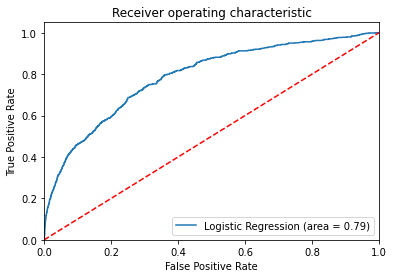

In [30]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
# NIE POPRAWIŁAM PONIŻSZEGO FEATURE SELECTION

In [16]:
for i in ['GARBAGE COLLECTION', 'BCN_over_barri_evolution', 'Barri_transport', 'Barri_evolution', 'Owns_a_car']:
    x_var.remove(i)

In [17]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [18]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.306124
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.178      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 2840.0943  
Date:                  2021-04-15 21:26                      BIC:                 3051.9114  
No. Observations:      4531                                  Log-Likelihood:      -1387.0    
Df Model:              32                                    LL-Null:             -1686.8    
Df Residuals:          4498                                  LLR p-value:         7.1866e-106
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [19]:
result.pvalues.sort_values(ascending=False)

CIRCULATION_GOOD                                6.166958e-01
FACADES AND BUILDING CONSERVATION_GOOD          5.537762e-01
MUNICIPAL POLICE_GOOD                           5.534458e-01
Gender                                          5.248419e-01
Monthly_family_income_< 1000 EUROS              4.146879e-01
BCN_over_barri_future                           3.501832e-01
STREETS CLEANING_GOOD                           3.021299e-01
MUNICIPAL MARKETS_GOOD                          2.870879e-01
PUBLIC LIGHTING_GOOD                            2.774155e-01
Monthly_family_income_2001-3000 EUROS           2.441590e-01
ASPHALT AND STREET CONSERVATION_GOOD            1.806988e-01
House_size_51-100 M2                            1.789817e-01
Living_alone                                    1.446895e-01
Monthly_family_income_> 3000 EUROS              1.427137e-01
House_size_< 50 M2                              1.390550e-01
House_size_> 150 M2                             1.224834e-01
GREEN AREAS_GOOD        

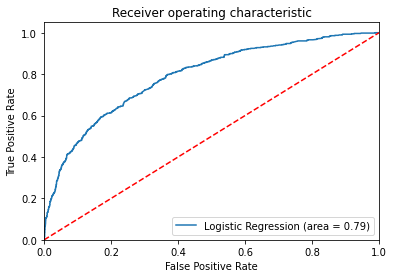

In [20]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [21]:
for i in ['FACADES AND BUILDING CONSERVATION', 'MUNICIPAL POLICE', 'CIRCULATION', 'Gender']:
    x_var.remove(i)

In [22]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [23]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.306261
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.177      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 2833.3386  
Date:                  2021-04-15 21:26                      BIC:                 3019.4809  
No. Observations:      4531                                  Log-Likelihood:      -1387.7    
Df Model:              28                                    LL-Null:             -1686.8    
Df Residuals:          4502                                  LLR p-value:         3.0238e-108
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [24]:
result.pvalues.sort_values(ascending=False)

Monthly_family_income_< 1000 EUROS              4.373059e-01
BCN_over_barri_future                           3.687793e-01
MUNICIPAL MARKETS_GOOD                          2.845520e-01
STREETS CLEANING_GOOD                           2.820591e-01
Monthly_family_income_2001-3000 EUROS           2.638510e-01
PUBLIC LIGHTING_GOOD                            2.563611e-01
House_size_51-100 M2                            1.832458e-01
ASPHALT AND STREET CONSERVATION_GOOD            1.749885e-01
Monthly_family_income_> 3000 EUROS              1.586795e-01
House_size_< 50 M2                              1.518652e-01
House_size_> 150 M2                             1.151963e-01
GREEN AREAS_GOOD                                1.123298e-01
Living_alone                                    1.093604e-01
BUS_GOOD                                        9.289572e-02
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD    6.167851e-02
BCN_over_barri_satisfaction_of_living           4.263587e-02
Barri_future_IT WILL IMP

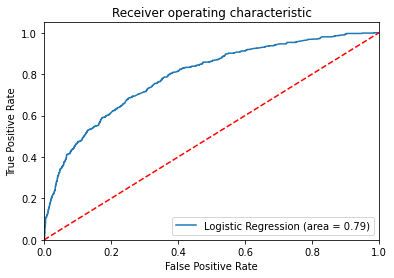

In [25]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [26]:
for i in ['BCN_over_barri_future', 'MUNICIPAL MARKETS', 'STREETS CLEANING', 'Monthly_family_income', 'PUBLIC LIGHTING']:
    x_var.remove(i)

In [27]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [28]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.307201
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.175      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 2827.8556  
Date:                  2021-04-15 21:26                      BIC:                 2969.0670  
No. Observations:      4531                                  Log-Likelihood:      -1391.9    
Df Model:              21                                    LL-Null:             -1686.8    
Df Residuals:          4509                                  LLR p-value:         2.1876e-111
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [29]:
result.pvalues.sort_values(ascending=False)

House_size_51-100 M2                            2.924579e-01
Living_alone                                    2.874739e-01
House_size_< 50 M2                              2.557090e-01
ASPHALT AND STREET CONSERVATION_GOOD            2.528628e-01
BUS_GOOD                                        9.518769e-02
House_size_> 150 M2                             8.673218e-02
GREEN AREAS_GOOD                                5.779307e-02
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD    5.082005e-02
BCN_over_barri_satisfaction_of_living           3.316672e-02
Social_class_MIDDLE-MIDDLE                      1.571353e-02
Social_class_MIDDLE-HIGH                        1.506337e-02
Time_living_in_barri_MORE THAN 10 YEARS         1.147237e-02
BCN_over_barri_transport                        1.123741e-02
CITIZEN SECURITY IN THE NEIGHBORHOOD_GOOD       1.098532e-02
Social_class_MIDDLE-LOW                         1.056081e-02
Social_class_LOW                                8.365345e-03
Barri_future_IT WILL STA

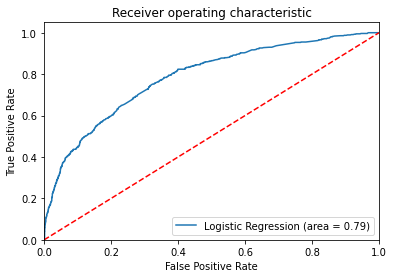

In [30]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [31]:
for i in ['House_size', 'Living_alone', 'ASPHALT AND STREET CONSERVATION']:
    x_var.remove(i)

In [32]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [33]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.307867
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.173      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 2823.8898  
Date:                  2021-04-15 21:26                      BIC:                 2933.0076  
No. Observations:      4531                                  Log-Likelihood:      -1394.9    
Df Model:              16                                    LL-Null:             -1686.8    
Df Residuals:          4514                                  LLR p-value:         6.2087e-114
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [34]:
result.pvalues.sort_values(ascending=False)

BUS_GOOD                                        1.283854e-01
GREEN AREAS_GOOD                                9.298168e-02
Social_class_MIDDLE-MIDDLE                      6.374127e-02
Social_class_MIDDLE-HIGH                        5.396609e-02
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD    4.254300e-02
Social_class_MIDDLE-LOW                         4.029244e-02
Social_class_LOW                                3.641516e-02
BCN_over_barri_satisfaction_of_living           2.782324e-02
CITIZEN SECURITY IN THE NEIGHBORHOOD_GOOD       1.337473e-02
BCN_over_barri_transport                        9.966625e-03
Time_living_in_barri_MORE THAN 10 YEARS         9.799170e-03
Barri_future_IT WILL STAY THE SAME              9.011909e-03
Barri_future_IT WILL IMPROVE                    1.714337e-03
Barri_satisfaction_of_living_SATISFIED          1.511147e-04
Barri_comparison_ONE OF THE WORST               3.840501e-07
Time_living_in_barri_LESS THAN 10 YEARS         2.382173e-08
Barri_comparison_ONE OF 

In [35]:
print(result.get_margeff().summary())

                Logit Marginal Effects               
Dep. Variable:     Would_not_stay_in_the_neighborhood
Method:                                          dydx
At:                                           overall
                                                  dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
BCN_over_barri_satisfaction_of_living            0.0457      0.021      2.204      0.028       0.005       0.086
BCN_over_barri_transport                         0.0331      0.013      2.580      0.010       0.008       0.058
Time_living_in_barri_LESS THAN 10 YEARS          0.1176      0.021      5.602      0.000       0.076       0.159
Time_living_in_barri_MORE THAN 10 YEARS          0.0388      0.015      2.583      0.010       0.009       0.068
Barri_future_IT WILL IMPROVE                    -0.0366      0.012     -3.141      0.002      -0.059      

In [36]:
result.pred_table()

array([[3923.,   52.],
       [ 471.,   85.]])

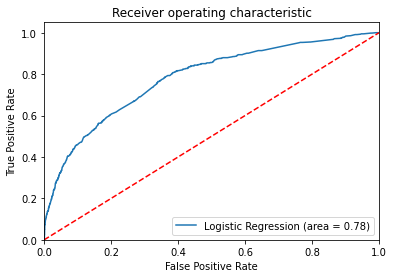

In [37]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()